# college data 

# problem statement

we need to predict chance of admission 

# import libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DATABASE SQL\\predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

present the null values

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
#grescore,tofelscore,universityrating null values

In [10]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

In [11]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


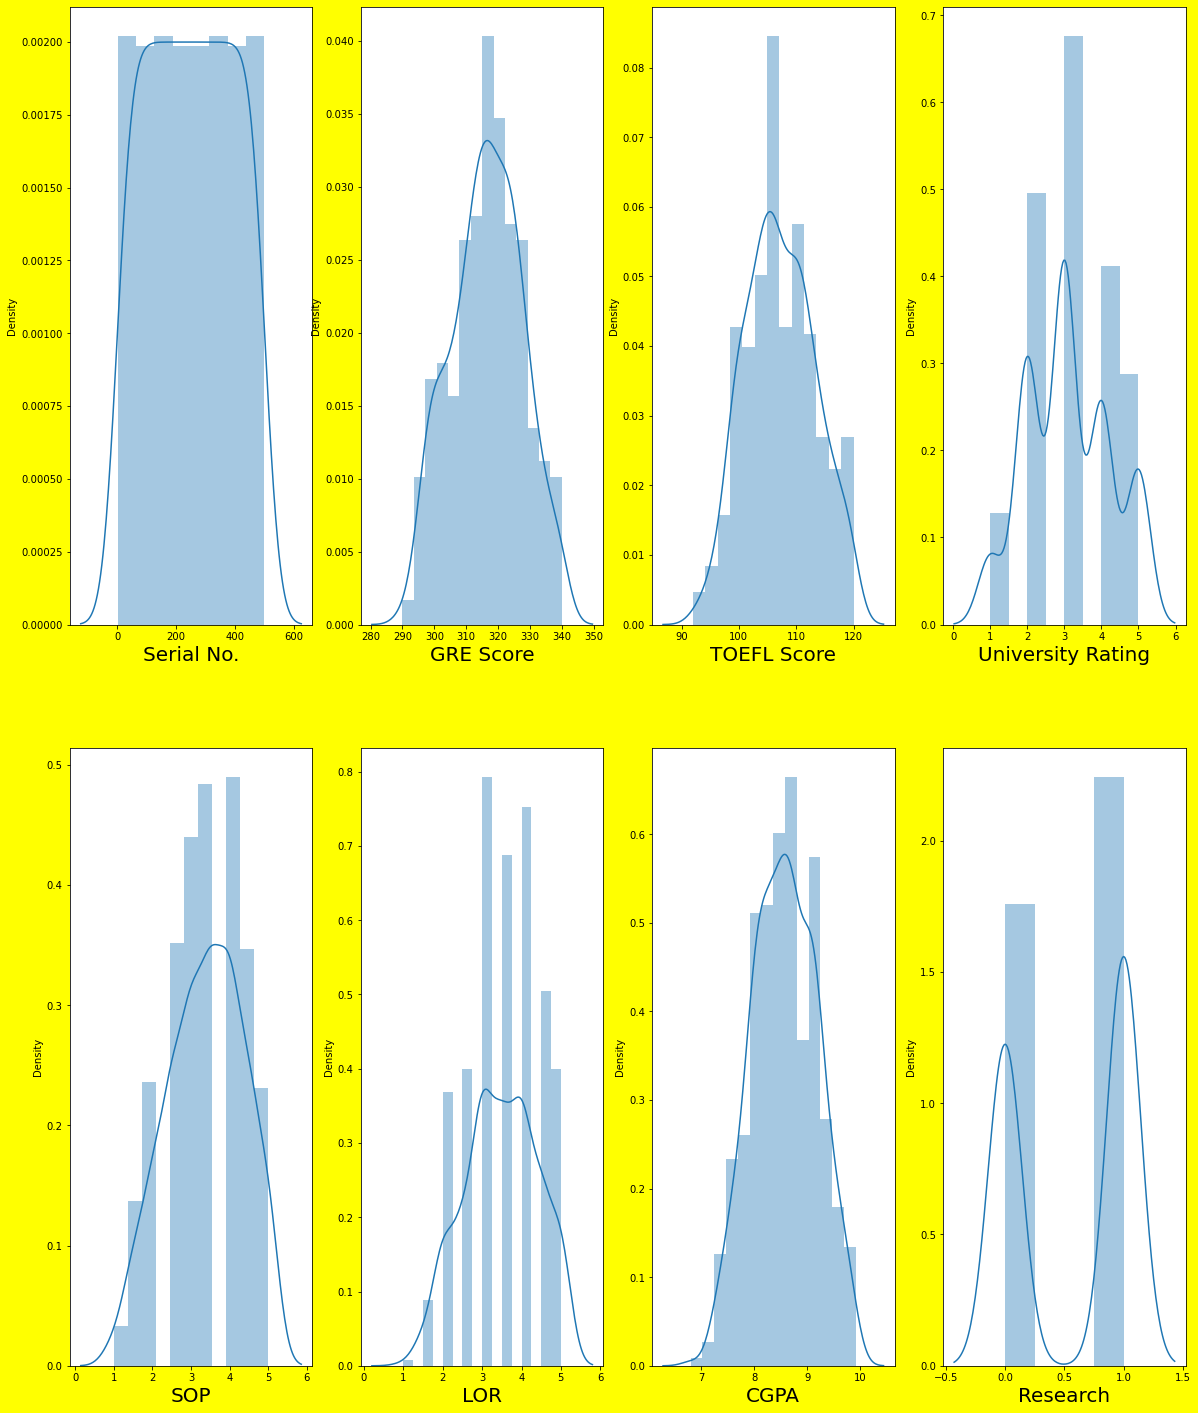

In [13]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

In [14]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [15]:
from pandas.plotting import scatter_matrix

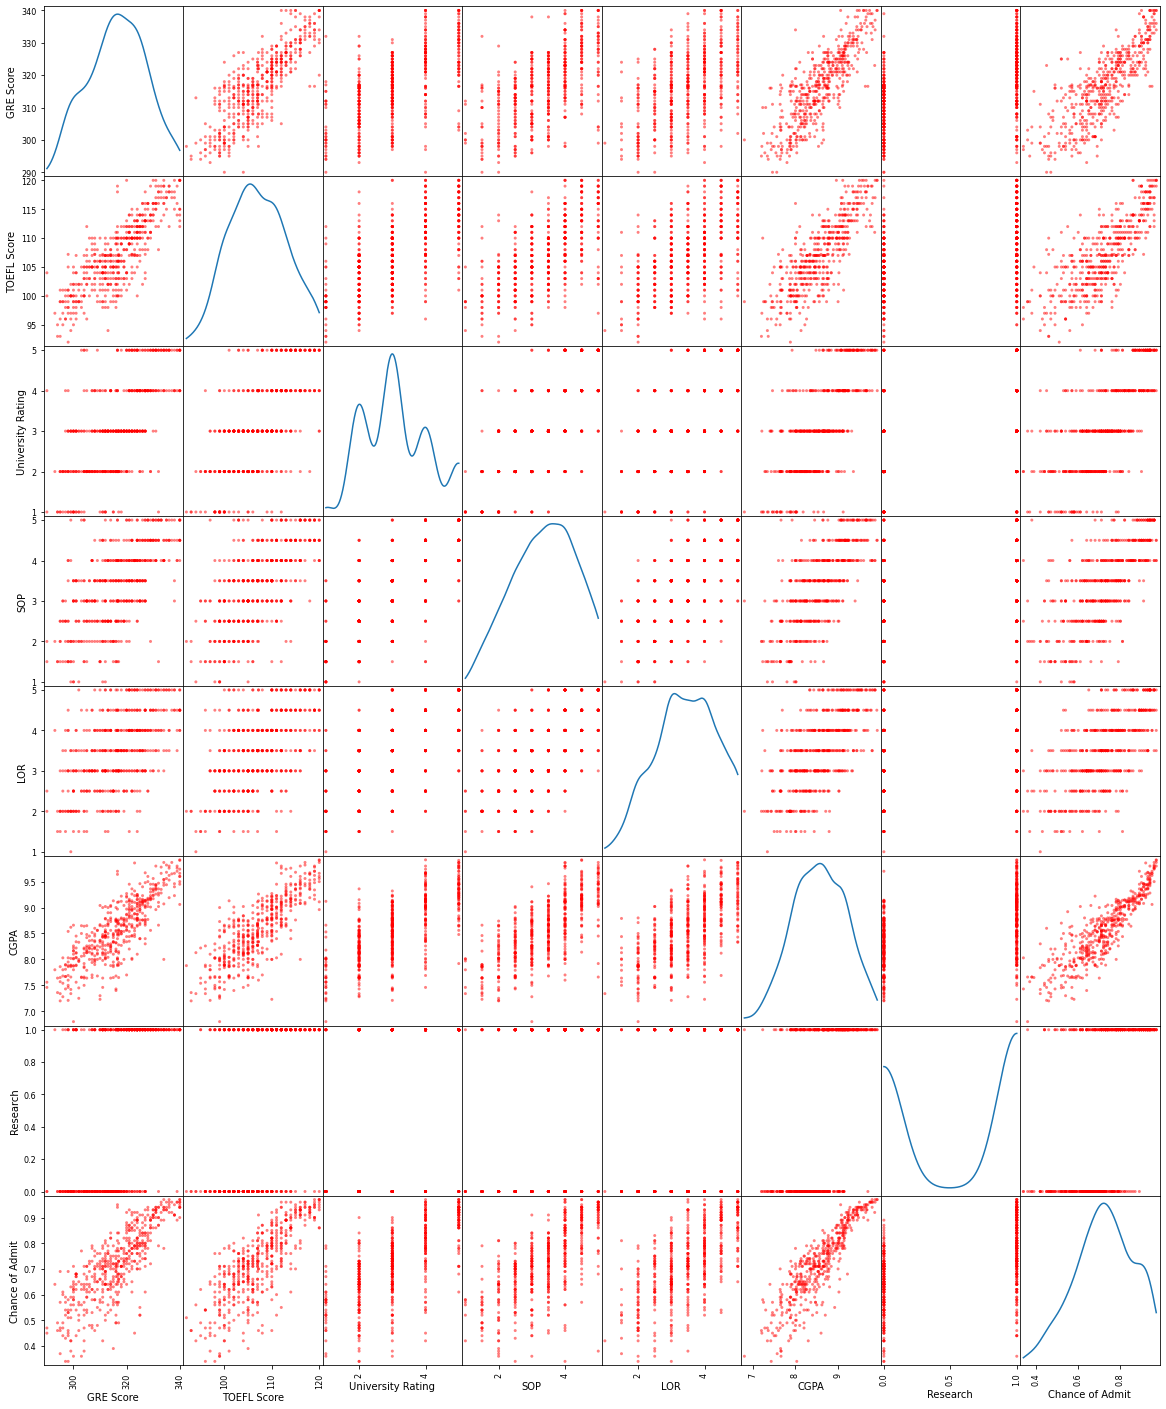

In [16]:
scatter_matrix(df,color='r',figsize=(20,25),diagonal='kde')
plt.show()

In [17]:
x = df.drop(['Chance of Admit'],axis=1)
y = df['Chance of Admit']

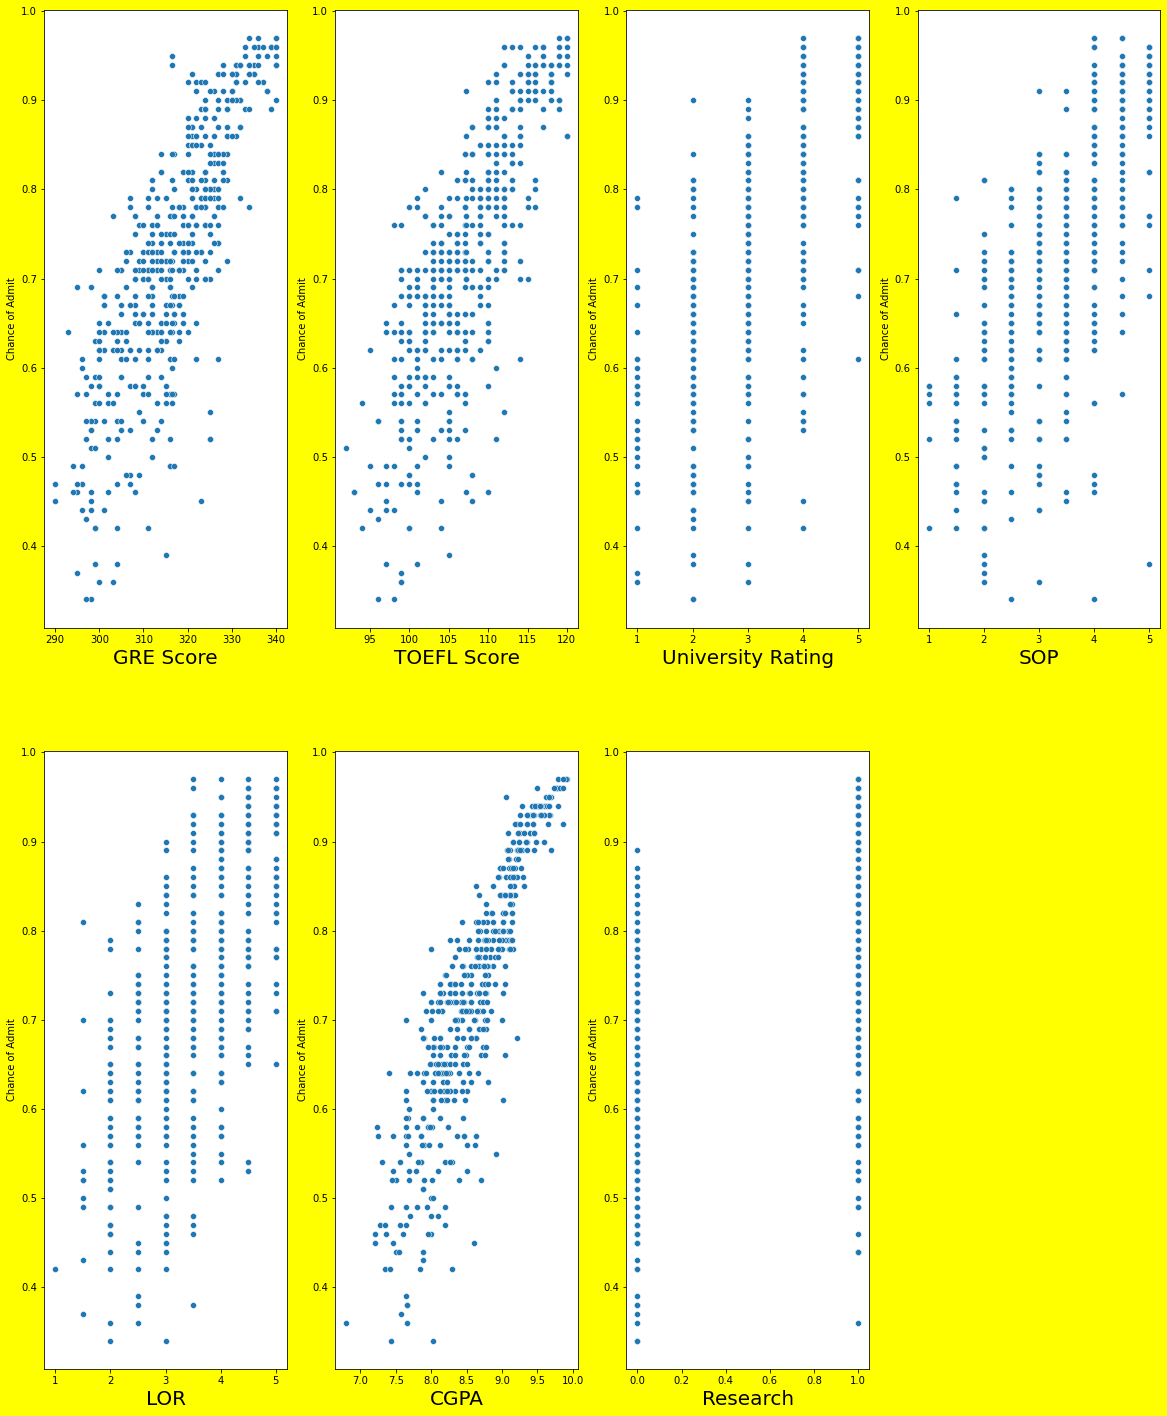

In [18]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in x:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

# histplot

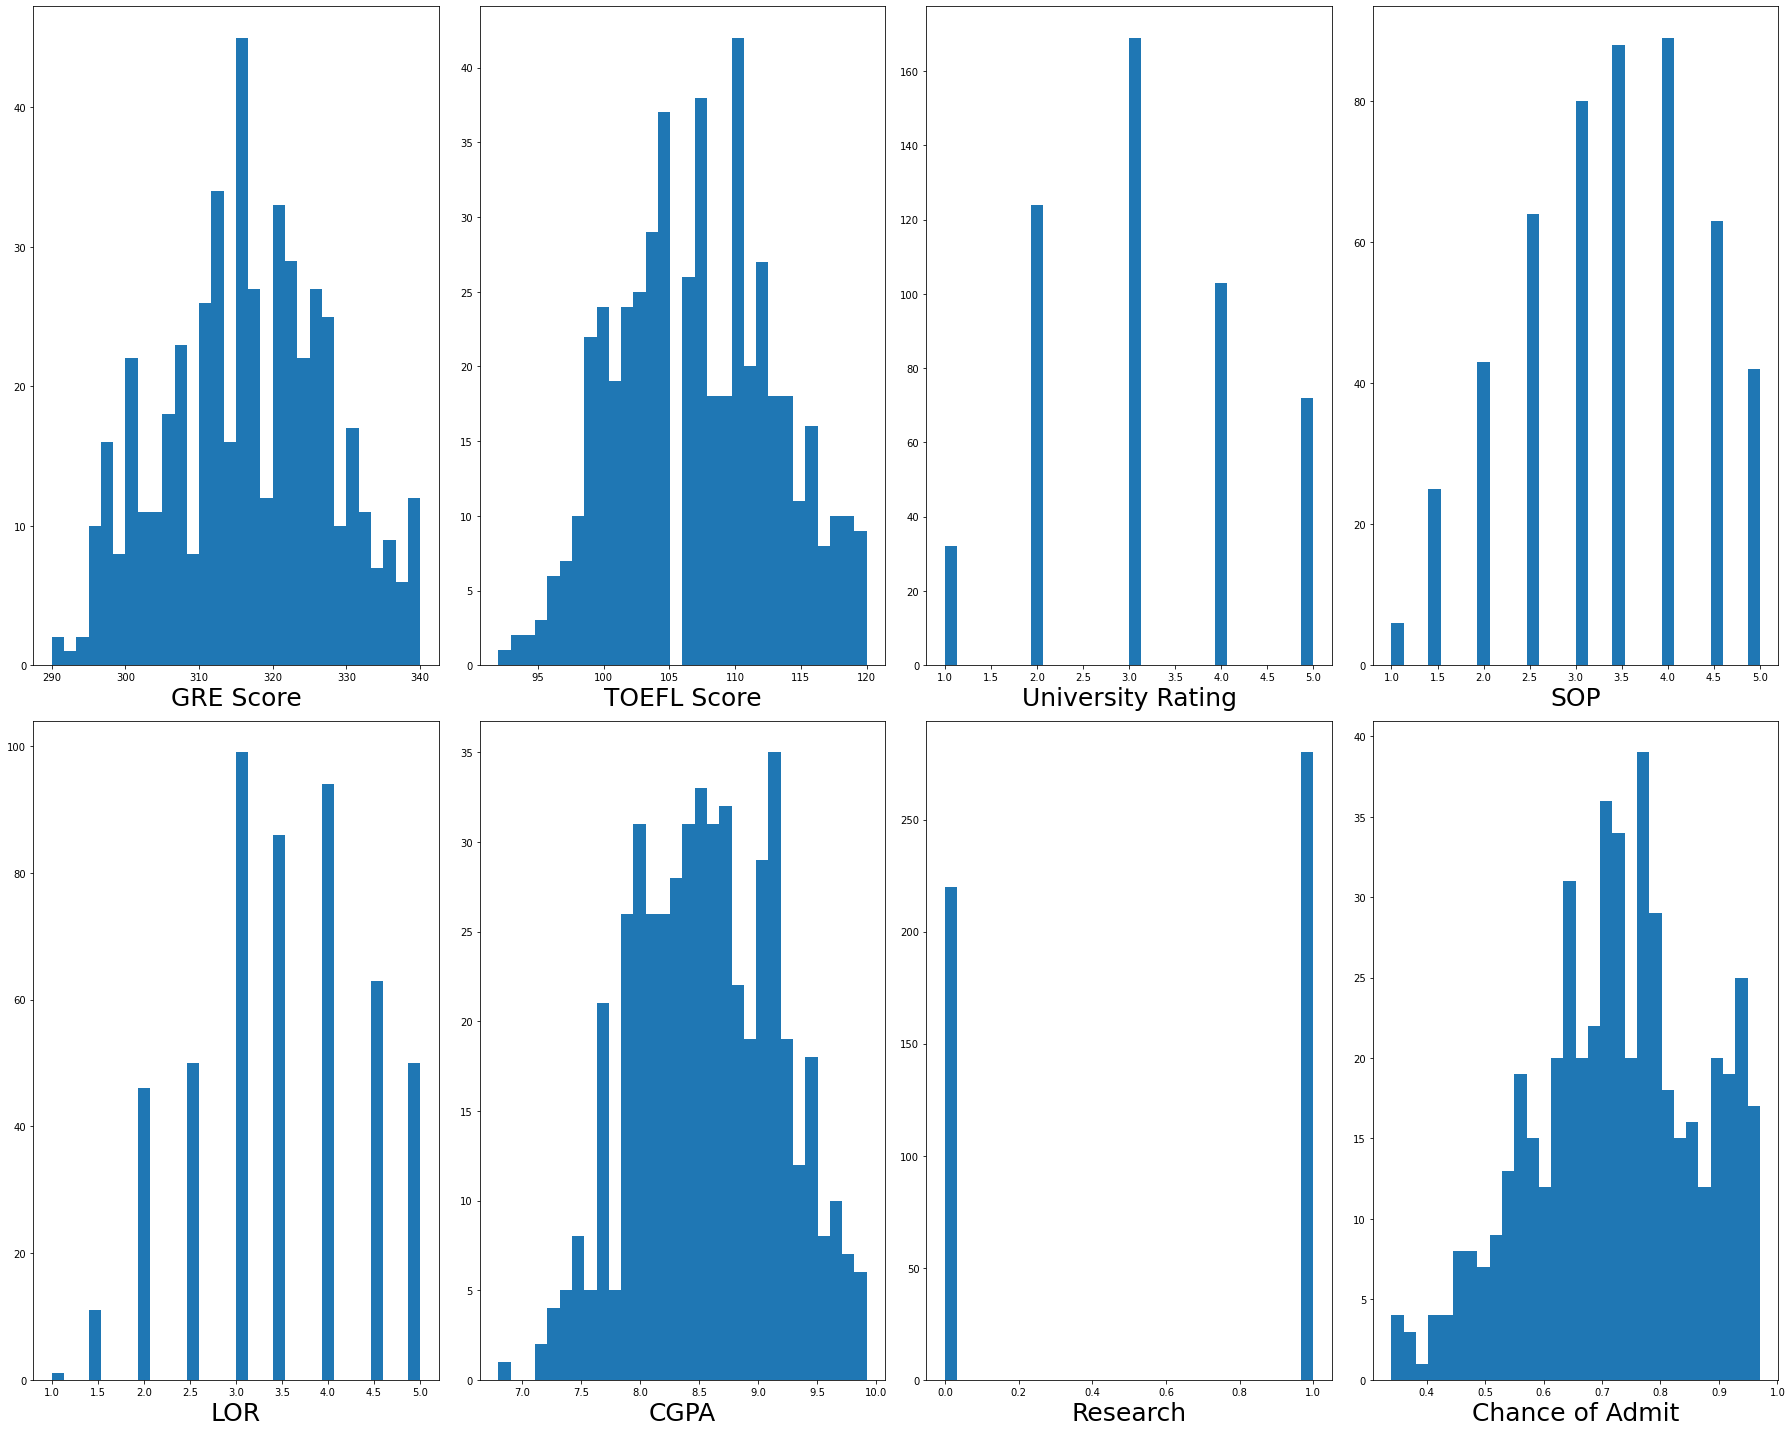

In [19]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()

# boxplot

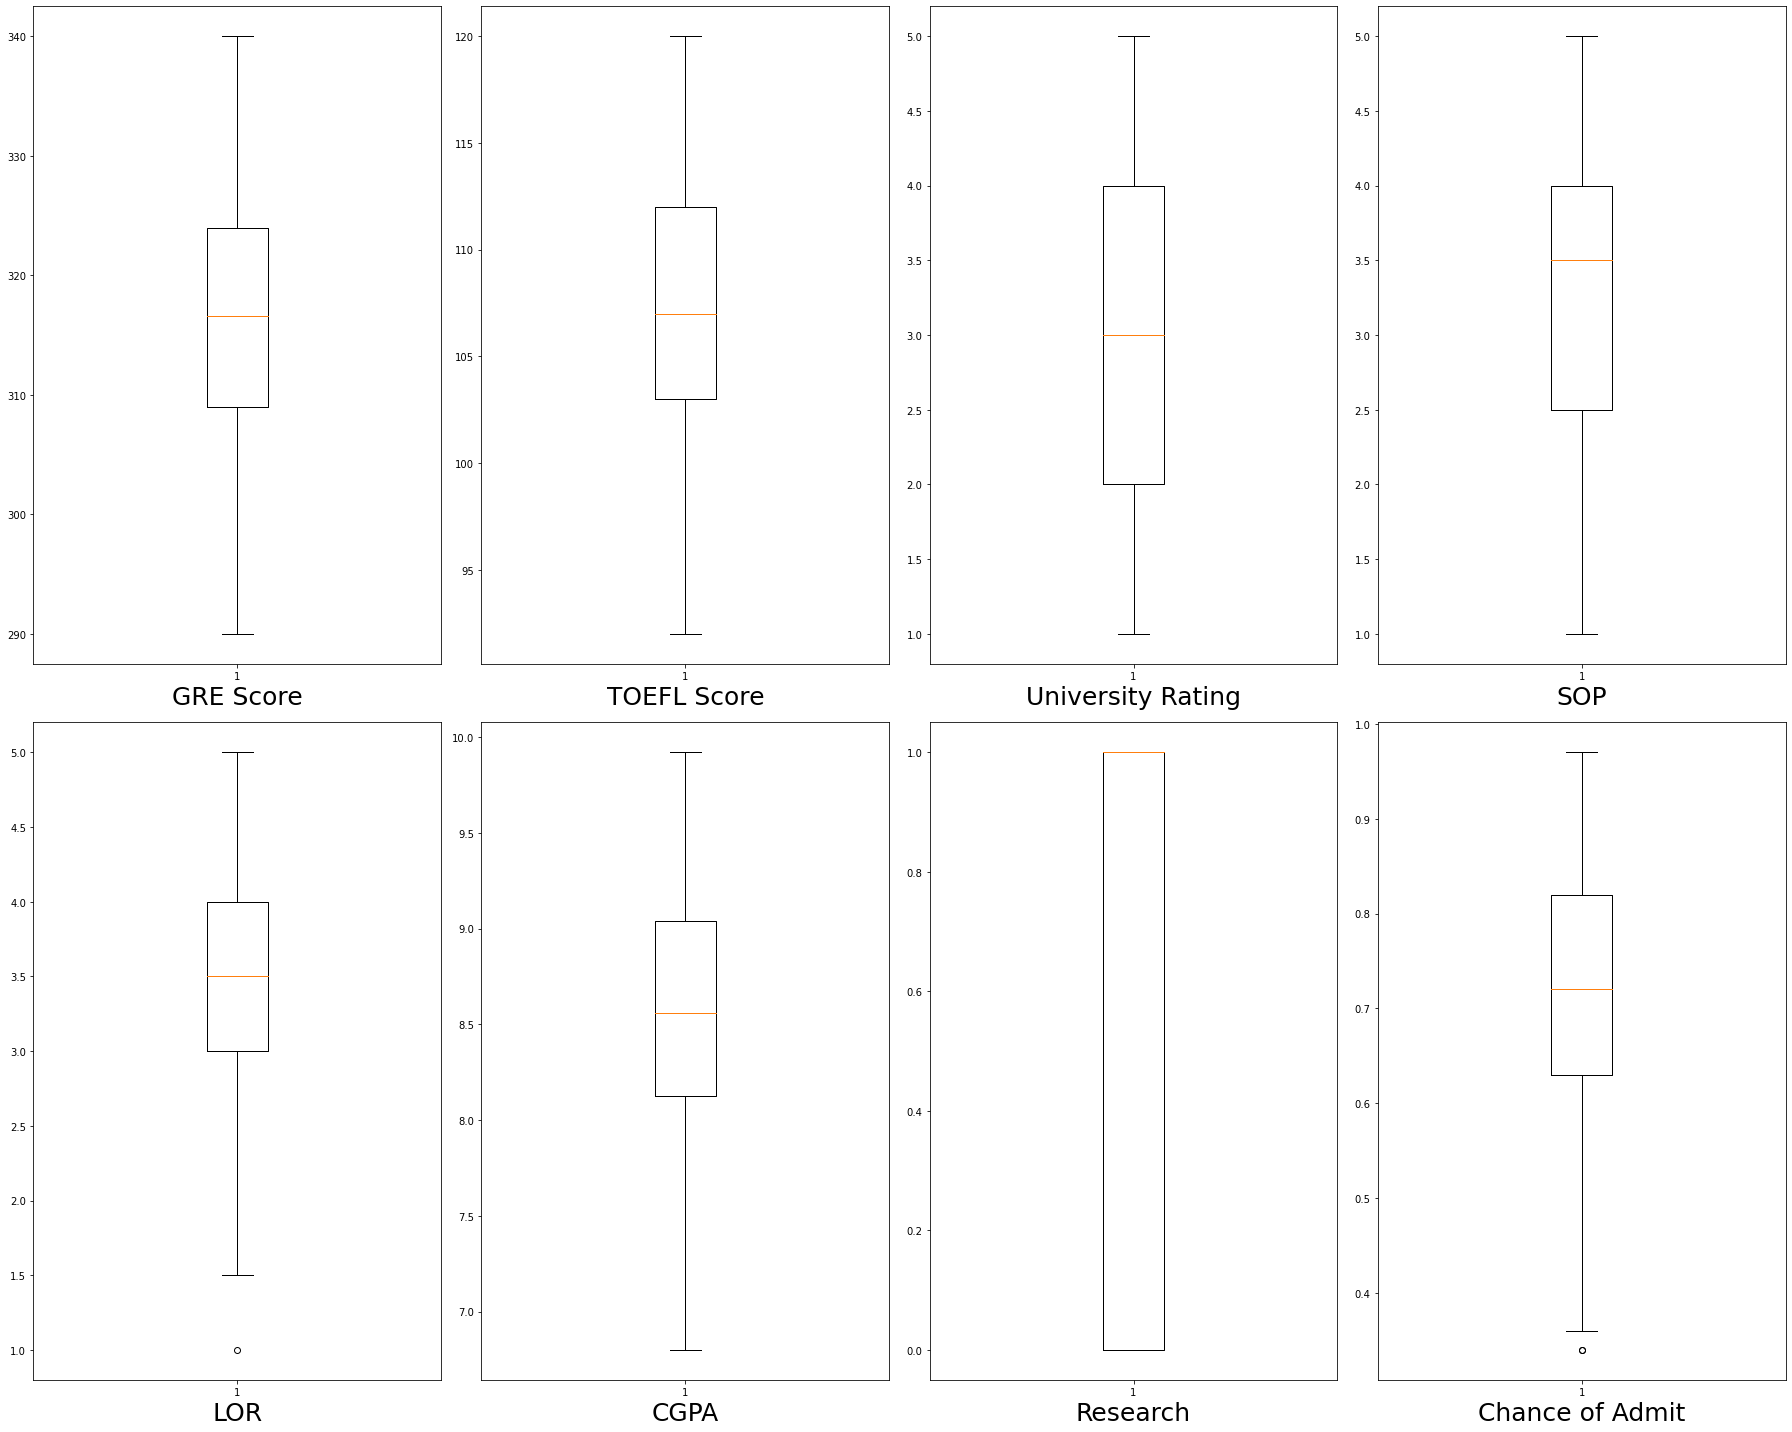

In [20]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()   

# scaling data

In [21]:
scaler = StandardScaler()

In [22]:
x_scaled = scaler.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=49)

# model training

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.predict(x_test)

array([0.77592728, 0.82189355, 0.53237459, 0.53158915, 0.71913576,
       0.78296644, 0.67493981, 0.71765858, 0.95026714, 0.51343088,
       0.82749034, 0.65490214, 0.65336809, 0.69515263, 0.67870849,
       0.68422187, 0.77066709, 0.69587358, 0.61306985, 0.91270759,
       0.83613353, 0.5101666 , 0.62095565, 0.90970737, 0.67081486,
       0.91154893, 0.52166984, 0.61229555, 0.85070914, 0.83034104,
       0.50493884, 0.73415525, 0.76966228, 0.61102598, 0.79870804,
       0.58112644, 0.75399139, 0.84620015, 0.86249992, 0.75216791,
       0.65235971, 0.96012442, 0.66118549, 0.6427768 , 0.6556939 ,
       0.50748275, 0.68440277, 0.61035881, 0.51200968, 0.73397561,
       0.76162862, 0.89663454, 0.58197652, 0.9320727 , 0.59682293,
       0.71741367, 0.94389341, 0.76641482, 0.59803781, 0.78678587,
       0.76864083, 0.69049847, 0.74159936, 0.85564167, 0.77807617,
       0.74212136, 0.69536291, 0.73242447, 0.99167787, 0.96534931,
       0.66420324, 0.65200556, 0.75069108, 0.73163753, 0.67942

In [27]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [28]:
lr.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

array([0.82582913])

In [29]:
#saving the model in local file

In [31]:
filename = 'final_model.pickle'
pickle.dump(lr,open(filename,'wb'))


In [33]:
#load the model
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))

In [34]:
a

array([0.82582913])

In [35]:
a = loaded_model.predict(x_test)

In [36]:
a

array([0.77592728, 0.82189355, 0.53237459, 0.53158915, 0.71913576,
       0.78296644, 0.67493981, 0.71765858, 0.95026714, 0.51343088,
       0.82749034, 0.65490214, 0.65336809, 0.69515263, 0.67870849,
       0.68422187, 0.77066709, 0.69587358, 0.61306985, 0.91270759,
       0.83613353, 0.5101666 , 0.62095565, 0.90970737, 0.67081486,
       0.91154893, 0.52166984, 0.61229555, 0.85070914, 0.83034104,
       0.50493884, 0.73415525, 0.76966228, 0.61102598, 0.79870804,
       0.58112644, 0.75399139, 0.84620015, 0.86249992, 0.75216791,
       0.65235971, 0.96012442, 0.66118549, 0.6427768 , 0.6556939 ,
       0.50748275, 0.68440277, 0.61035881, 0.51200968, 0.73397561,
       0.76162862, 0.89663454, 0.58197652, 0.9320727 , 0.59682293,
       0.71741367, 0.94389341, 0.76641482, 0.59803781, 0.78678587,
       0.76864083, 0.69049847, 0.74159936, 0.85564167, 0.77807617,
       0.74212136, 0.69536291, 0.73242447, 0.99167787, 0.96534931,
       0.66420324, 0.65200556, 0.75069108, 0.73163753, 0.67942

# model confidence adjusted rsquared

In [37]:
lr.score(x_train,y_train)

0.8145910304382725

In [38]:
lr.score(x_test,y_test)

0.8377796652353541

In [39]:
y_pred = lr.predict(x_test)

# lets plot 

Text(0, 0.5, 'predicted value')

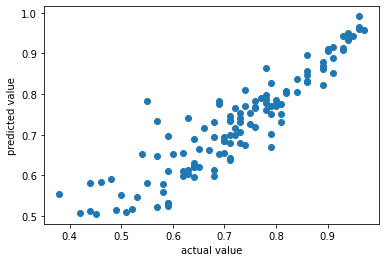

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')

# model evalution

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(y_test,y_pred)

0.039094962124450475

In [44]:
mean_squared_error(y_test,y_pred)

0.0030559237967637495

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05528041060596194

# you have model suscessfully linear regression model

# now lets chek our model overfitting using regularization

# regularization

In [46]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [47]:
lassocv = LassoCV(alphas=None,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [49]:
alpha = lassocv.alpha_
alpha

2.4249979092466713e-05

In [50]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.4249979092466713e-05)

In [53]:
lasso_reg.score(x_test,y_test)

0.8477693209792768

# ridge regression L2

In [55]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [56]:
ridgecv.alpha_

0.020999999999999998

In [58]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [59]:
ridge_model.score(x_test,y_test)

0.8377744626802441